## **1. Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Load the Dataset**

In [2]:
df=pd.read_csv('../data/raw/WELFake_Dataset.csv')

## **3. Dataset Information and Data Types**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


## **4. Display First Few Rows**

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


## **5. Check Dataset Shape**

In [6]:
df.shape

(72134, 4)

## **6. Inspect Column Names**

In [7]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

## **7. Check for Missing Values**

In [8]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

## **8. Remove Missing Values**

In [9]:
df=df.dropna()

## **9. Remove Unnecessary Index Column (If Present)**

In [10]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

## **10. Verify Dataset After Cleaning Columns**

In [11]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


## **11. Analyze Class Distribution (Fake vs Real)**

In [12]:
df['label'].value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

## **12. Visualize Class Distribution**

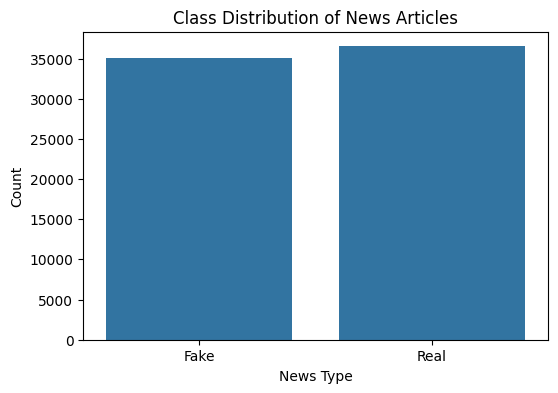

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.xticks([0,1], ['Fake', 'Real'])
plt.title("Class Distribution of News Articles")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()


## **13. Combine Title and Text for Analysis**

In [14]:
df['content'] = df['title'] + " " + df['text']

## **14. Analyze Text Length Statistics**

In [15]:
df['text_length'] = df['content'].apply(len)
df['text_length'].describe()

count     71537.000000
mean       3370.785482
std        3737.519052
min          14.000000
25%        1490.000000
50%        2516.000000
75%        4156.000000
max      143035.000000
Name: text_length, dtype: float64

## **15. Visualize Text Length Distribution**

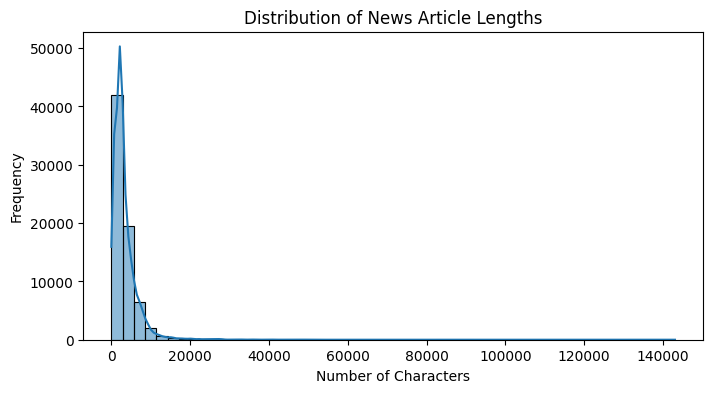

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of News Article Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


## **16. Inspect Sample Real News Articles**

In [17]:
df[df['label'] == 1][['title', 'content']].head(2)

,title,content
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...


## **17. Summary of Key Observations**

- The dataset contains long-form news articles suitable for NLP tasks  
- Both fake and real news samples are well represented  
- Article lengths vary significantly, justifying TF-IDF feature extraction  
- No major missing data issues after basic cleaning  

## **18. EDA Conclusion**

The exploratory data analysis confirms that the dataset is clean, balanced, and appropriate 
for building a machine learning-based news credibility classification system.

Insights from this analysis guide the next steps:
- Text preprocessing
- Feature extraction using TF-IDF
- Supervised model training and evaluation